In [1]:
import numpy as np
import pandas as pd
import os
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\samue\\GitHub\\Amazon-Review'

In [3]:
dataset=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','Rating','timestamp'])

In [4]:
dataset_original=dataset.copy()

In [5]:
dataset.head(10)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [6]:
dataset.describe()

,Rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [8]:
dataset.info

<bound method DataFrame.info of                  userId   productId  Rating   timestamp
0         AKM1MP6P0OYPR  0132793040     5.0  1365811200
1        A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2        A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3        A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4        A1GI0U4ZRJA8WN  0439886341     1.0  1334707200
...                 ...         ...     ...         ...
7824477  A2YZI3C9MOHC0L  BT008UKTMW     5.0  1396569600
7824478  A322MDK0M89RHN  BT008UKTMW     5.0  1313366400
7824479  A1MH90R0ADMIK0  BT008UKTMW     4.0  1404172800
7824480  A10M2KEFPEQDHN  BT008UKTMW     4.0  1297555200
7824481  A2G81TMIOIDEQQ  BT008V9J9U     5.0  1312675200

[7824482 rows x 4 columns]>

In [9]:
dataset.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [10]:
dataset['Rating'].min()

1.0

In [11]:
dataset['Rating'].max()

5.0

In [12]:
dataset.isnull()

,userId,productId,Rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
7824477,False,False,False,False
7824478,False,False,False,False
7824479,False,False,False,False
7824480,False,False,False,False


<AxesSubplot:>

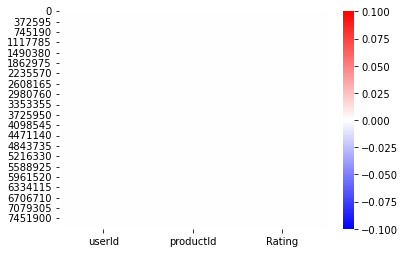

In [73]:
sns.heatmap(dataset.isnull(), cmap='bwr')

In [14]:
dataset.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

[Text(0, 0.5, 'Total Number of Rating')]

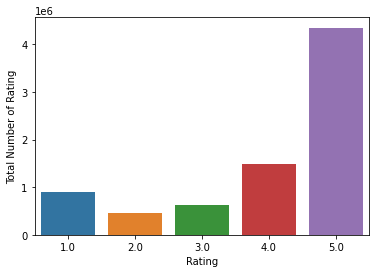

In [15]:
#plt.figure(figsize = (15,8))
ax = sns.countplot(x="Rating", data=dataset)
ax.set(ylabel='Total Number of Rating')

In [16]:
dataset.head(10)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [17]:
dataset["Rating"].count()

7824482

In [18]:
len(dataset["productId"].unique())

476002

In [19]:
len(dataset["userId"].unique())

4201696

In [20]:
dataset.drop(['timestamp'], axis=1,inplace=True)

### Analyzing the Rating

In [21]:
num_of_rate_each_user = dataset.groupby(by='userId')['Rating'].count()

In [22]:
num_of_rate_each_user.sort_values(ascending=False)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2HRB8UOXH92SQ      1
A2HRBA4HO2E4GU      1
A2HRBCM00IDK56      1
A2HRBEBDTIB8MT      1
AZZZY1W55XHZR       1
Name: Rating, Length: 4201696, dtype: int64

In [23]:
num_of_rate_each_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

In [24]:
quantiles = num_of_rate_each_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

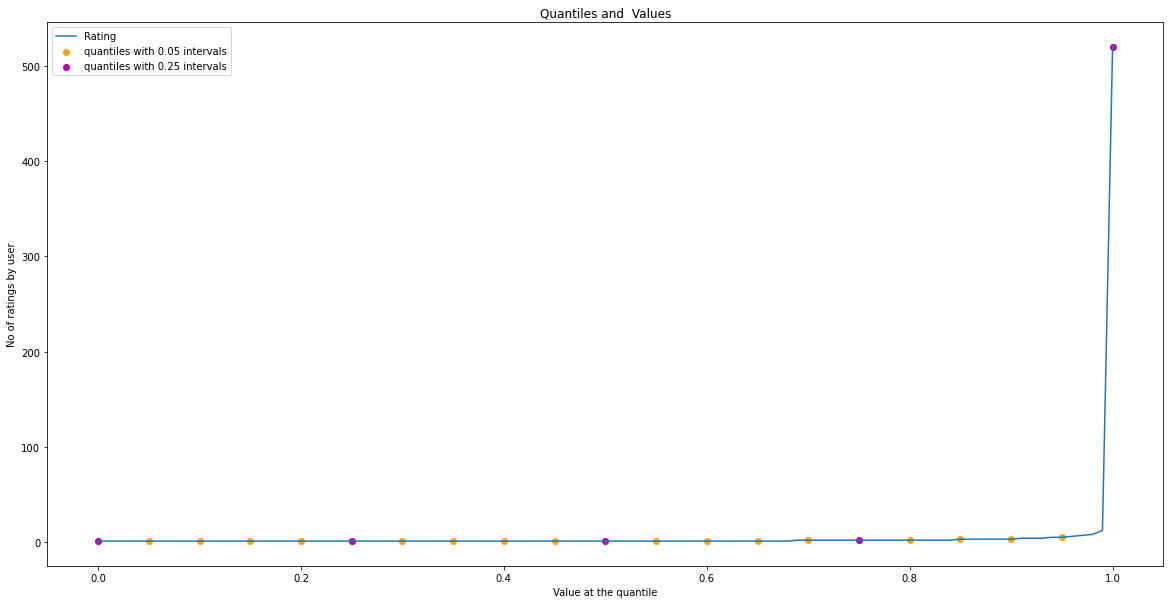

In [79]:
plt.figure(figsize=(20,10))
plt.title("Quantiles and  Values")
quantiles.plot()
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

In [80]:
num_of_rate_each_user

userId
A00000262KYZUE4J55XGL    1
A000063614T1OE0BUSKUT    2
A00009182QVLSWIGHLS1B    1
A00009661LC9LQPGKJ24G    1
A00010809P09NUU6ZP6H     1
                        ..
AZZZOVIBXHGDR            3
AZZZRS1YZ8HVP            2
AZZZSIK7NFFVP            1
AZZZWXXUPZ1F3            1
AZZZY1W55XHZR            1
Name: Rating, Length: 4201696, dtype: int64

<br>

### Popularity Based Recommendation

<br>

In [27]:
df=dataset.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

In [88]:
df

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
7824223,A2857SW4TZ841C,B00L3YHF6O,1.0
7824224,A2Y2NSH2HVFAOA,B00L3YHF6O,5.0
7824225,A3TC2716OF7HK8,B00L3YHF6O,5.0
7824226,AYCPSPX7XZ21G,B00L3YHF6O,5.0


In [29]:
num_of_ratings_per_product = df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

In [74]:
num_of_ratings_per_product

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B002653KNQ       50
B001W81LZ2       50
B0001G6UES       50
B008NC8IB0       50
B0012Y6VQA       50
Name: Rating, Length: 26226, dtype: int64

Text(0, 0.5, 'No of ratings per product')

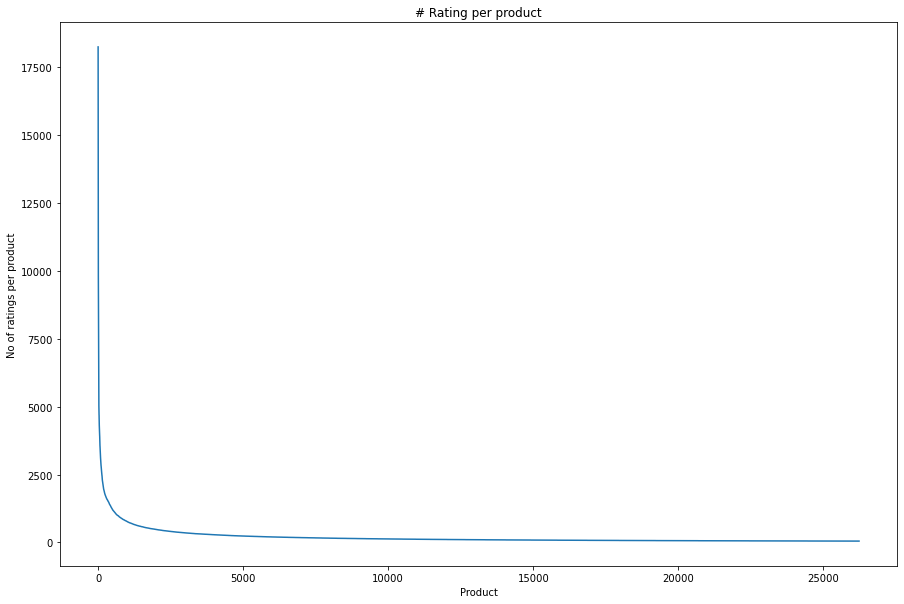

In [30]:
plt.figure(figsize = (15,10))
plt.plot(num_of_ratings_per_product.values)
plt.title('# Rating per product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')

In [31]:
df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head(15)

productId
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
B00GMRCAC6    4.951872
B008I6RVZU    4.951456
B00CG70K78    4.949367
B0000DYV9H    4.947368
B000053HC5    4.945783
B004C4VLZS    4.945455
B00DVPG81G    4.943396
B00531DZKI    4.941176
B008VGCT9K    4.939130
B00836JHVQ    4.935484
Name: Rating, dtype: float64

In [90]:
df.groupby('productId')['Rating'].mean().sort_values(ascending=False).tail(15)

productId
B002ZUI68G    1.588850
B00093040Y    1.568627
B000NNFS4C    1.554054
B0002325XK    1.531250
B0096KLPUY    1.518519
B004OXIUOC    1.509091
B00020QJC6    1.500000
B0023ARFOO    1.473684
B000KUYTDE    1.415842
B000C4ATGY    1.360000
B001T9N0R6    1.343284
B001IUQB2W    1.290323
B000NIK9V4    1.230769
B00024L6P2    1.203704
B008LUM1DU    1.127273
Name: Rating, dtype: float64

In [32]:
df.groupby('productId')['Rating'].count().sort_values(ascending=False).head(15)

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
Name: Rating, dtype: int64

In [33]:
ratings_mean_count = pd.DataFrame(df.groupby('productId')['Rating'].mean())

In [34]:
ratings_mean_count['Rating_counts'] = pd.DataFrame(df.groupby('productId')['Rating'].count())

In [35]:
ratings_mean_count

,Rating,Rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
...,...,...
B00KFAGCUM,4.824427,131
B00KGGJPX6,4.592593,54
B00KINSDK8,3.576923,52


In [36]:
ratings_mean_count

,Rating,Rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
...,...,...
B00KFAGCUM,4.824427,131
B00KGGJPX6,4.592593,54
B00KINSDK8,3.576923,52


In [37]:
ratings_mean_count['Rating_counts'].max()

18244

In [38]:
ratings_mean_count['Rating_counts'].min()

50

<AxesSubplot:>

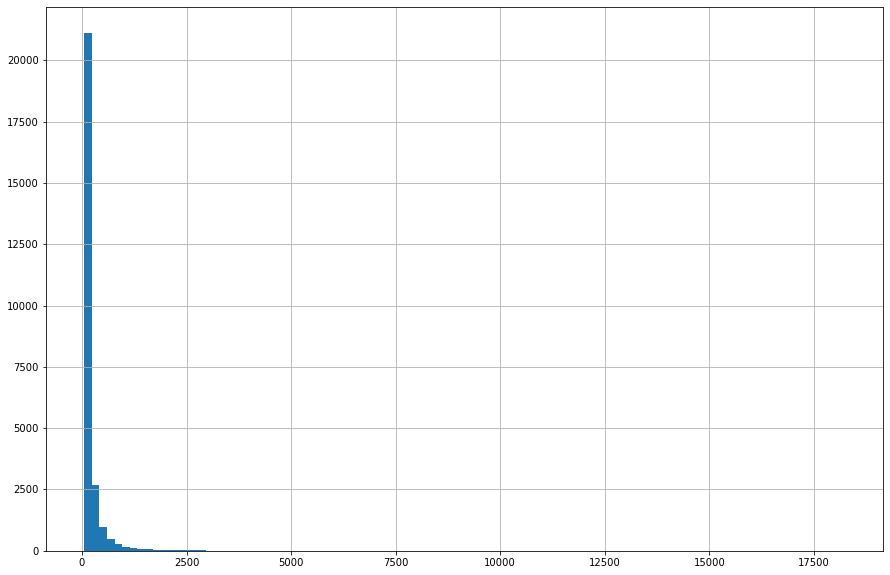

In [39]:
plt.figure(figsize=(15,10))
ratings_mean_count['Rating_counts'].hist(bins=100)

<AxesSubplot:>

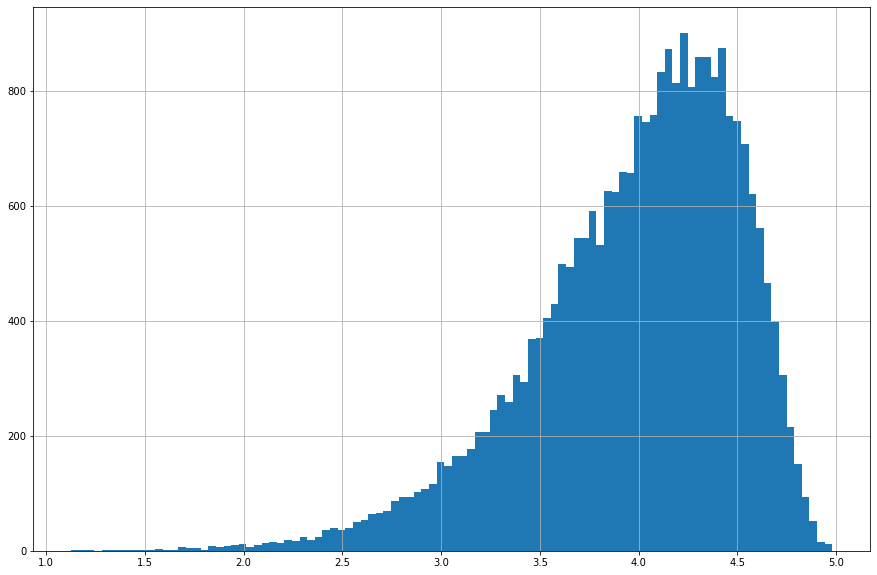

In [40]:
plt.figure(figsize=(15,10))
ratings_mean_count['Rating'].hist(bins=100)

<Figure size 1080x720 with 0 Axes>

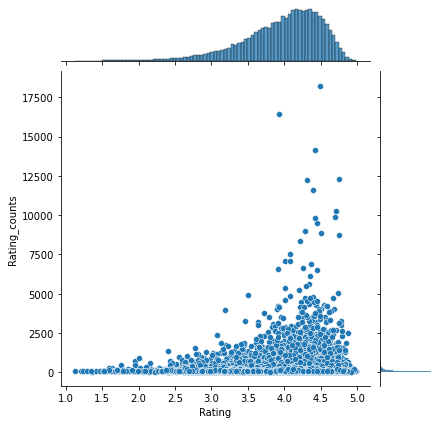

In [41]:
plt.figure(figsize=(15,10))
sns.jointplot(x='Rating', y='Rating_counts', data=ratings_mean_count)

In [42]:
products = pd.DataFrame(df.groupby('productId')['Rating'].count())

In [43]:
products

,Rating
productId,
0972683275,1051
1400501466,250
1400501520,82
1400501776,139
1400532620,171
...,...
B00KFAGCUM,131
B00KGGJPX6,54
B00KINSDK8,52


In [44]:
popular_product = products.sort_values('Rating', ascending=False)

In [46]:
popular_product

,Rating
productId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
...,...
B002653KNQ,50
B001W81LZ2,50
B0001G6UES,50


<AxesSubplot:xlabel='productId'>

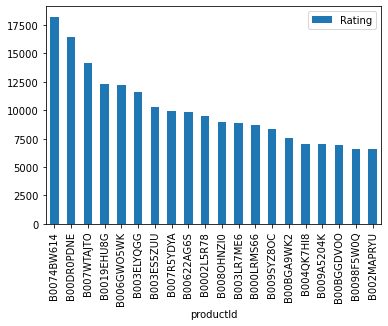

In [47]:
#plt.figure(figsize=(20,10))
popular_product.head(20).plot(kind = "bar")

In [48]:
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
#conda install -c conda-forge scikit-surprise

In [49]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df,reader)

In [50]:
train, test = train_test_split(data, test_size=0.3,random_state=10)

In [52]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [53]:
test_pred = algo.test(test)

In [54]:
test_pred

[Prediction(uid='A3VURW93K8J9EZ', iid='B001DUQU0A', r_ui=5.0, est=4.122448979591836, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1X5EZN73CXAEA', iid='B008R6OPJQ', r_ui=5.0, est=4.8008872864826335, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A2XRRKO9JFOU1X', iid='B001URUQ7Y', r_ui=4.0, est=4.062666084355236, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A57QKCO2MWP2O', iid='B002UXQKFY', r_ui=5.0, est=4.062666084355236, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2701472A9TBLL', iid='B005FMKJ1I', r_ui=2.0, est=4.062666084355236, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ATOU63RU2ZZ2Y', iid='B006U1YVZ8', r_ui=4.0, est=4.052303860523039, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A16JVX4D0OG2KY', iid='B003VWYBC2', r_ui=2.0, est=3.6745562130177514, details={'actual_k': 

In [55]:
print("Item-based Model : Test")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test
RMSE: 1.3335


1.3334560899557941

In [57]:
new_df=df.head(10000)
ratings_matrix = new_df.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)

In [59]:
ratings_matrix.head(10)

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0590501PZ7HOWJKBGQ4,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
A0641581307AKT5MAOU0Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A076219533YHEV2LJO988,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0821988FXKFYX53V4QG,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
ratings_matrix.shape

(9832, 76)

In [61]:
X = ratings_matrix.T
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X.shape

(76, 9832)

In [63]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [64]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [65]:
X.index[75]

'B00000K135'

In [66]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [67]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

In [68]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['7214047977',
 '9573212919',
 '9625993428',
 '9983891212',
 'B00000J05A',
 'B00000J1F3',
 'B00000J1TX',
 'B00000J1UQ',
 'B00000J4EY',
 'B00000J6WY',
 'B00000JCT8',
 'B00000JD34',
 'B00000JFMK',
 'B00000JYWQ']